<!-- Startup Sucess EDA -->

# StartUp Sucess- EDA

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
from tabulate import tabulate
# !pip install folium
import folium
# %pip install yfinance
# %pip install tweepy
# %pip install wbdata pandas
import sys
sys.path.append('../src')

import yfinance as yf
import datetime
# import tweepy
import wbdata
from preprocess import preprocess_data_classifier

# Explore and adjust data

## functions

### add economic info

### add & adjust data

In [2]:
# load data:
df = pd.read_csv('../data/startup_data.csv')
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


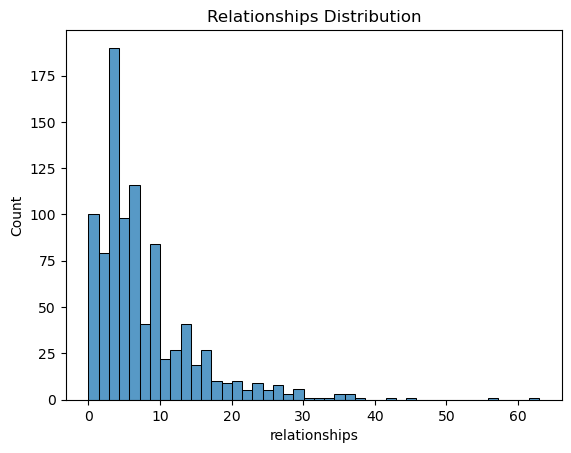

In [3]:
sns.histplot(df['relationships'])
plt.title('Relationships Distribution')
plt.show()

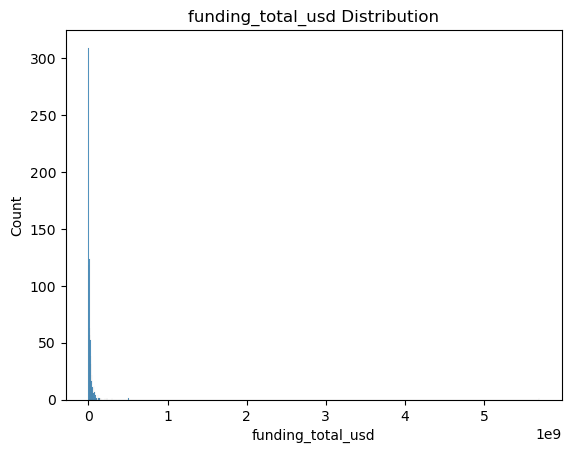

In [4]:
sns.histplot(df['funding_total_usd'])
plt.title('funding_total_usd Distribution')
plt.show()

In [8]:
df_cleaned, xx = preprocess_data_classifier(df, useKNNImputer=False, remove_feature_names=False)

/home/mayavb/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
df_cleaned.head()

,0,1,2,3,4,5,6,7,8,9,...,has_roundC,has_roundD,avg_participants,is_top500,first_funding_at_year,first_funding_at_month,first_funding_at_day,last_funding_at_year,last_funding_at_month,last_funding_at_day
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.541550,-0.324244,-0.976196,-2.033805,0.655214,-0.579983,-0.926741,0.395267,-1.462555,-1.249880
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.846552,3.084093,1.031087,0.491689,-1.097192,-1.134509,0.377734,-0.065793,1.669152,1.510941
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.541550,-0.324244,0.629631,0.491689,1.093315,-0.857246,1.983242,0.395267,-0.893154,1.715446
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.846552,3.084093,0.272763,0.491689,-1.097192,-1.134509,0.678767,-0.987913,-0.608453,1.204183
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.541550,-0.324244,-0.976196,0.491689,1.093315,0.529069,-0.926741,1.317387,-0.608453,-1.249880


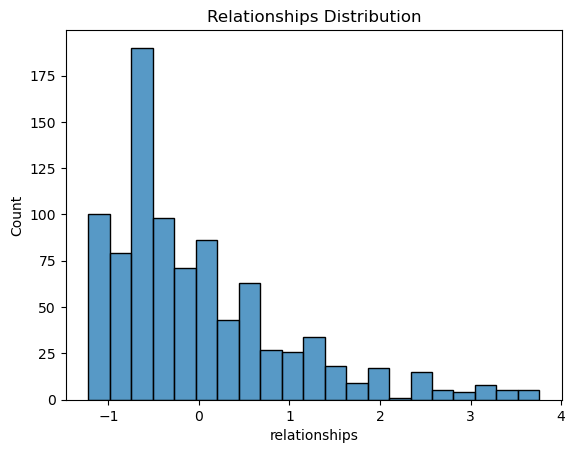

In [12]:
sns.histplot(df_cleaned['relationships'])
plt.title('Relationships Distribution')
plt.show()

In [ ]:
sns.histplot(df_cleaned['relationships'])
plt.title('Relationships cleaned distribution')
plt.show()

In [ ]:
import yfinance as yf

# Create lable
df['status_code'] = df['status'].map({'acquired': 1, 'closed': 0})

# Convert the date column to datetime
df['founded_at_date'] = pd.to_datetime(df['founded_at'])

# Extract year, month, and day into separate columns
df['founded_at_year'] = df['founded_at_date'].dt.year
df['founded_at_month'] = df['founded_at_date'].dt.month
df['founded_at_day'] = df['founded_at_date'].dt.day

# remove irrelevant columns:
df = df.drop(columns=['status', 'founded_at', 'name', 'id', 'state_code.1', 'object_id', 'category_code', 'labels', 'closed_at',"Unnamed: 6","Unnamed: 0"])
# Add nasdaq data
df = add_nasdaq_annual_changes(df)

indicator_code = 'NY.GDP.MKTP.KD.ZG'
df = add_economic_indicators(df, indicator_code) # will replace add_us_gdp_growth_data_over_years

indicator_code = 'SL.UEM.TOTL.ZS'  # Unemployment rate, percentage of total labor force
df = add_economic_indicators(df, indicator_code) # will replace add_us_gdp_growth_data_over_years

In [ ]:
df.info()

In [ ]:
columns_with_nan = df.columns[df.isna().any()].tolist()
print(columns_with_nan)


There are 2 columns with missing values - 'age_first_milestone_year', 'age_last_milestone_year'. The companies that have no value in those columns also have 0 in milestones column. So, in order to deal with the missing values, we used a correlation matrix and we discovered that age_last_funding_year column has the highest correlation with 'age_first_milestone_year' & 'age_last_milestone_year'. (It make sense since one the company's milestones coulld be raising certain amount of money which could be done by funding).



In [ ]:
# looking at the columns with the missing values:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(df['age_first_milestone_year'], bins=20, color='blue',ax=axes[0])
axes[0].set_title('age_first_milestone_year', fontsize=15)
axes[0].set_xlabel('age_first_milestone_year', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
plt.grid()
print('age_first_milestone_year', ' skewness:', df['age_first_milestone_year'].skew(axis = 0, skipna = True) )
df['age_first_milestone_year'].describe(include='all')

sns.histplot(data=df['age_last_milestone_year'],bins=20, color='red',ax=axes[1])
axes[1].set_title('age_last_milestone_year', fontsize=15)
axes[1].set_xlabel('age_last_milestone_year', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
plt.grid()
print('age_last_milestone_year', ' skewness:', df['age_last_milestone_year'].skew(axis = 0, skipna = True) )


# Get descriptive statistics
desc_first = df['age_first_milestone_year'].describe(include='all')
desc_last = df['age_last_milestone_year'].describe(include='all')

# Combine the statistics into a single DataFrame
desc_table = pd.DataFrame({
    'age_first_milestone_year': desc_first,
    'age_last_milestone_year': desc_last
})

# Display the table with tabulate
print(tabulate(desc_table, headers='keys', tablefmt='pretty'))


In [ ]:
#let's look for correlations for those columns.

# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only = True)

# Find correlations with the columns containing missing values
correlations_first_milestone_age = correlation_matrix['age_first_milestone_year'].abs().sort_values(ascending=False)
correlations_age_last_milestone_year = correlation_matrix['age_last_milestone_year'].abs().sort_values(ascending=False)

# Print the correlations
print(correlations_first_milestone_age[correlations_first_milestone_age>0.5])
print(correlations_age_last_milestone_year[correlations_age_last_milestone_year>0.5])

# We see that last_funding_age is highly correlated with our columns.
# It could make sense since it's reasonable that one of a company's milestones is to raise certin amount of money which could
# be done by funding. 

In order to fill in the missing values we used the basic knn algorithm. Then, we evaluated the effectiveness of the imputation process and assessed the quality of the imputed data by comparing summary statistics (e.g., mean, median, standard deviation) before and after the imputation. We see that the results are very much alike, so we can proceed.

In [ ]:
from sklearn.impute import KNNImputer

# fill in the missing values using knn:

# Create a copy of the DataFrame with only the columns of interest 
columns_with_missing_values = ['age_first_milestone_year','age_last_milestone_year']
columns_of_interest = ['age_last_funding_year'] + columns_with_missing_values
data_subset = df[columns_of_interest].copy()

# Instantiate the KNNImputer with the desired number of neighbors
knn_imputer = KNNImputer(n_neighbors=5) 

# Fit and transform the data
imputed_data = knn_imputer.fit_transform(data_subset)

# Replace the missing values in the original DataFrame with the imputed values
for i, col in enumerate(columns_with_missing_values):
    df[col] = imputed_data[:, i + 1]  

##### To evaluate the effectiveness of the imputation process and assess the quality of the imputed data, 
##### we are comparing summary statistics(e.g., mean, median, standard deviation) before (2 cells above) and after the
##### imputation (the next cell). We see that the results are very much alike.

In [ ]:
# looking at the columns with the missing values:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(df['age_first_milestone_year'], bins=20, color='blue',ax=axes[0])
axes[0].set_title('age_first_milestone_year', fontsize=15)
axes[0].set_xlabel('age_first_milestone_year', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
plt.grid()
print('age_first_milestone_year', ' skewness:', df['age_first_milestone_year'].skew(axis = 0, skipna = True) )
df['age_first_milestone_year'].describe(include='all')

sns.histplot(data=df['age_last_milestone_year'],bins=20, color='red',ax=axes[1])
axes[1].set_title('age_last_milestone_year', fontsize=15)
axes[1].set_xlabel('age_last_milestone_year', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
plt.grid()
print('age_last_milestone_year', ' skewness:', df['age_last_milestone_year'].skew(axis = 0, skipna = True) )


# Get descriptive statistics
desc_first = df['age_first_milestone_year'].describe(include='all')
desc_last = df['age_last_milestone_year'].describe(include='all')

# Combine the statistics into a single DataFrame
desc_table = pd.DataFrame({
    'age_first_milestone_year': desc_first,
    'age_last_milestone_year': desc_last
})

# Display the table with tabulate
print(tabulate(desc_table, headers='keys', tablefmt='pretty'))


In [ ]:
# #deal with different date formats
# from datetime import datetime

# dates_in_df = ['last_funding_at','first_funding_at','founded_at']

# formatted_dates = []
# formatted_dates_MONTH_DAY = []
# formatted_dates_YEAR = []
# for ind in dates_in_df:
#     dates = df[ind]
#     for date in dates:
#         # Try to parse the date string as MM/DD/YYYY
#         try:
#             parsed_date = datetime.strptime(date, '%m/%d/%Y')
#         # If it fails, assume the date string is in M/D/YYYY format
#         except ValueError:
#             parsed_date = datetime.strptime(date, '%m/%d/%Y')
#         # Extract month and year from the parsed date
#         day = parsed_date.strftime('%d')
#         month = parsed_date.strftime('%m')
#         year = parsed_date.strftime('%Y')
#         # Combine month and year as a string in MM/YYYY format
#         formatted_date_MONTH_DAY = f"{month}/{day}"
#         formatted_dates_MONTH_DAY.append(formatted_date_MONTH_DAY)
#         # year format only
#         formatted_date_YEAR = f"{year}"
#         formatted_dates_YEAR.append(formatted_date_YEAR)
#         # Convert the parsed date back to a string in MM/DD/YYYY format
#         formatted_date = parsed_date.strftime('%m/%d/%Y')
#         formatted_dates.append(formatted_date)
               
     
#     df[ind] = formatted_dates
#     df[ind + 'MONTH/DAY'] = formatted_dates_MONTH_DAY
#     df[ind + 'YEAR'] = formatted_dates_YEAR
#     formatted_dates = []
#     formatted_dates_MONTH_DAY = []
#     formatted_dates_YEAR = []
# df

In [ ]:
# category_counts = df['category_code'].value_counts()
# plt.figure(figsize=(10, 8))
# sns.barplot(x=category_counts.values, y=category_counts.index, palette='Set2')
# plt.title('Most Common Categories', fontsize=16)
# plt.xlabel('Count', fontsize=14)
# plt.ylabel('Category', fontsize=14)
# plt.xticks(rotation=0, fontsize=12)
# plt.yticks(fontsize=12)
# plt.show()

### Split to nominal and numerical attributes

In [ ]:
numeric_col = df.describe().columns # to get the numeric column
numeric_data = df[numeric_col]
nominal_data = df.drop(numeric_col, axis=1)
numeric_data

We Created a folium map – a geographic interface – where we can see all the companies around the world, and we color coded it so that the successful companies are green colored, and the unsuccessful companies are red colored.

In [ ]:
# Create a folium map centered on the first location in the dataframe
map = folium.Map(location=[numeric_data['latitude'][0], numeric_data['longitude'][0]], zoom_start=5)

for i in range(len(numeric_data)):
    popup_text = f"{df['status_code'][i]} "
    if df['status_code'][i] == 1:
        c = 'green'
    else:# Target = closed
        c = 'red'

    folium.Marker([numeric_data['latitude'][i], numeric_data['longitude'][i]],
        icon=folium.Icon(color=c,popup = popup_text), icon_size=(70, 70)).add_to(map)
    
# Display the map
map


We used cross-tabulation (crosstab) table to show that most of the companies are in CA and 2/3 of them were successful. So, it might be an indication that there's a strong connection between the companies location and their chance to succeed. We then show a similar connection using in_Top500 column.

In [ ]:
# cross-tabulation (crosstab) table
ct = pd.crosstab(index=df['status_code'], columns=[df['is_NY'],df['is_MA'], df['is_CA'], df['is_TX'],df['is_otherstate']])
ct

In [ ]:
# cross-tabulation (crosstab) table
ct = pd.crosstab(index=df['status_code'], columns=[df['is_top500']])
ct

We noticed, using boxplot, that in funding_total_usd column we have outliers. We found that there was one company that raised a lot of money, compared to the other companies. We decided to use log data transformation. 

In [ ]:
sns.boxplot(y="funding_total_usd", data=numeric_data)

In [ ]:
# outliers:
data_mean = df['funding_total_usd'].mean()
data_std = df['funding_total_usd'].std()
cut_off = data_std * 3
lower_bound = data_mean - cut_off
upper_bound = data_mean + cut_off
df.loc[(df['funding_total_usd'] > upper_bound) | (df['funding_total_usd'] < lower_bound)]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df['funding_total_usd_log'] = np.log(df['funding_total_usd'])
scaler = MinMaxScaler()
df['total_funding_normalized'] = scaler.fit_transform(df[['funding_total_usd_log']])


# df[['funding_total_usd','total_funding_normalized']].head()
sns.displot(df['total_funding_normalized'], bins=25, color='gray')


In [ ]:
sns.boxplot(y="total_funding_normalized", data=df)

Preprocess:

In [ ]:
df.info() # after preprocess

Visualization:

In [ ]:
# plot funding bins using a bar plot
bin_edges = [0, 100000, 500000, 1000000, 5000000, 10000000, df['funding_total_usd'].max()] # binning funding_total_usd- i use this since histplot was unclear
bin_labels = ['0-100K', '100K-500K', '500K-1M', '1M-5M', '5M-10M', '10M+']
df['funding_bins'] = pd.cut(df['funding_total_usd'], bins=bin_edges, labels=bin_labels, include_lowest=True)

funding_bin_counts = df['funding_bins'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=funding_bin_counts.index, y=funding_bin_counts.values, palette='viridis')
plt.title('Distribution of Funding Total USD Bins')
plt.xlabel('Funding Bins')
plt.ylabel('Number of Startups')


In [ ]:
sns.histplot(df['relationships'])
plt.title('Relationships Distribution')
plt.show()

In [ ]:
# Pair plot
sns.pairplot(df[['age_first_funding_year', 'age_last_funding_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones']])
plt.show()


In [ ]:
# Distribution of status
plt.figure(figsize=(6, 6))
sns.countplot(x='status_code', data=df, palette='viridis')
plt.title('Distribution of Startup Status')


In [ ]:
# Violin plot for funding rounds distribution by status
plt.figure(figsize=(10, 6))
sns.violinplot(x='status_code', y='funding_rounds', data=df, palette='viridis')
plt.title('Funding Rounds Distribution by Status')


In [ ]:
# df.to_csv('df.csv', index=False)
